In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../data/network_tf_gene.txt', sep='\t', header=None, comment='#').drop([3, 4, 5], axis=1)[:3]
df.columns = ['tf', 'gene', 'effect']

In [9]:
G = nx.from_pandas_edgelist(df=df, source='tf', target='gene', edge_attr='effect')
# Laplacian matrix of a graph is symmetric, positive semidefinite, and singular
L = nx.laplacian_matrix(G, nodelist=sorted(G.nodes()))
L_eigen = nx.laplacian_spectrum(G)

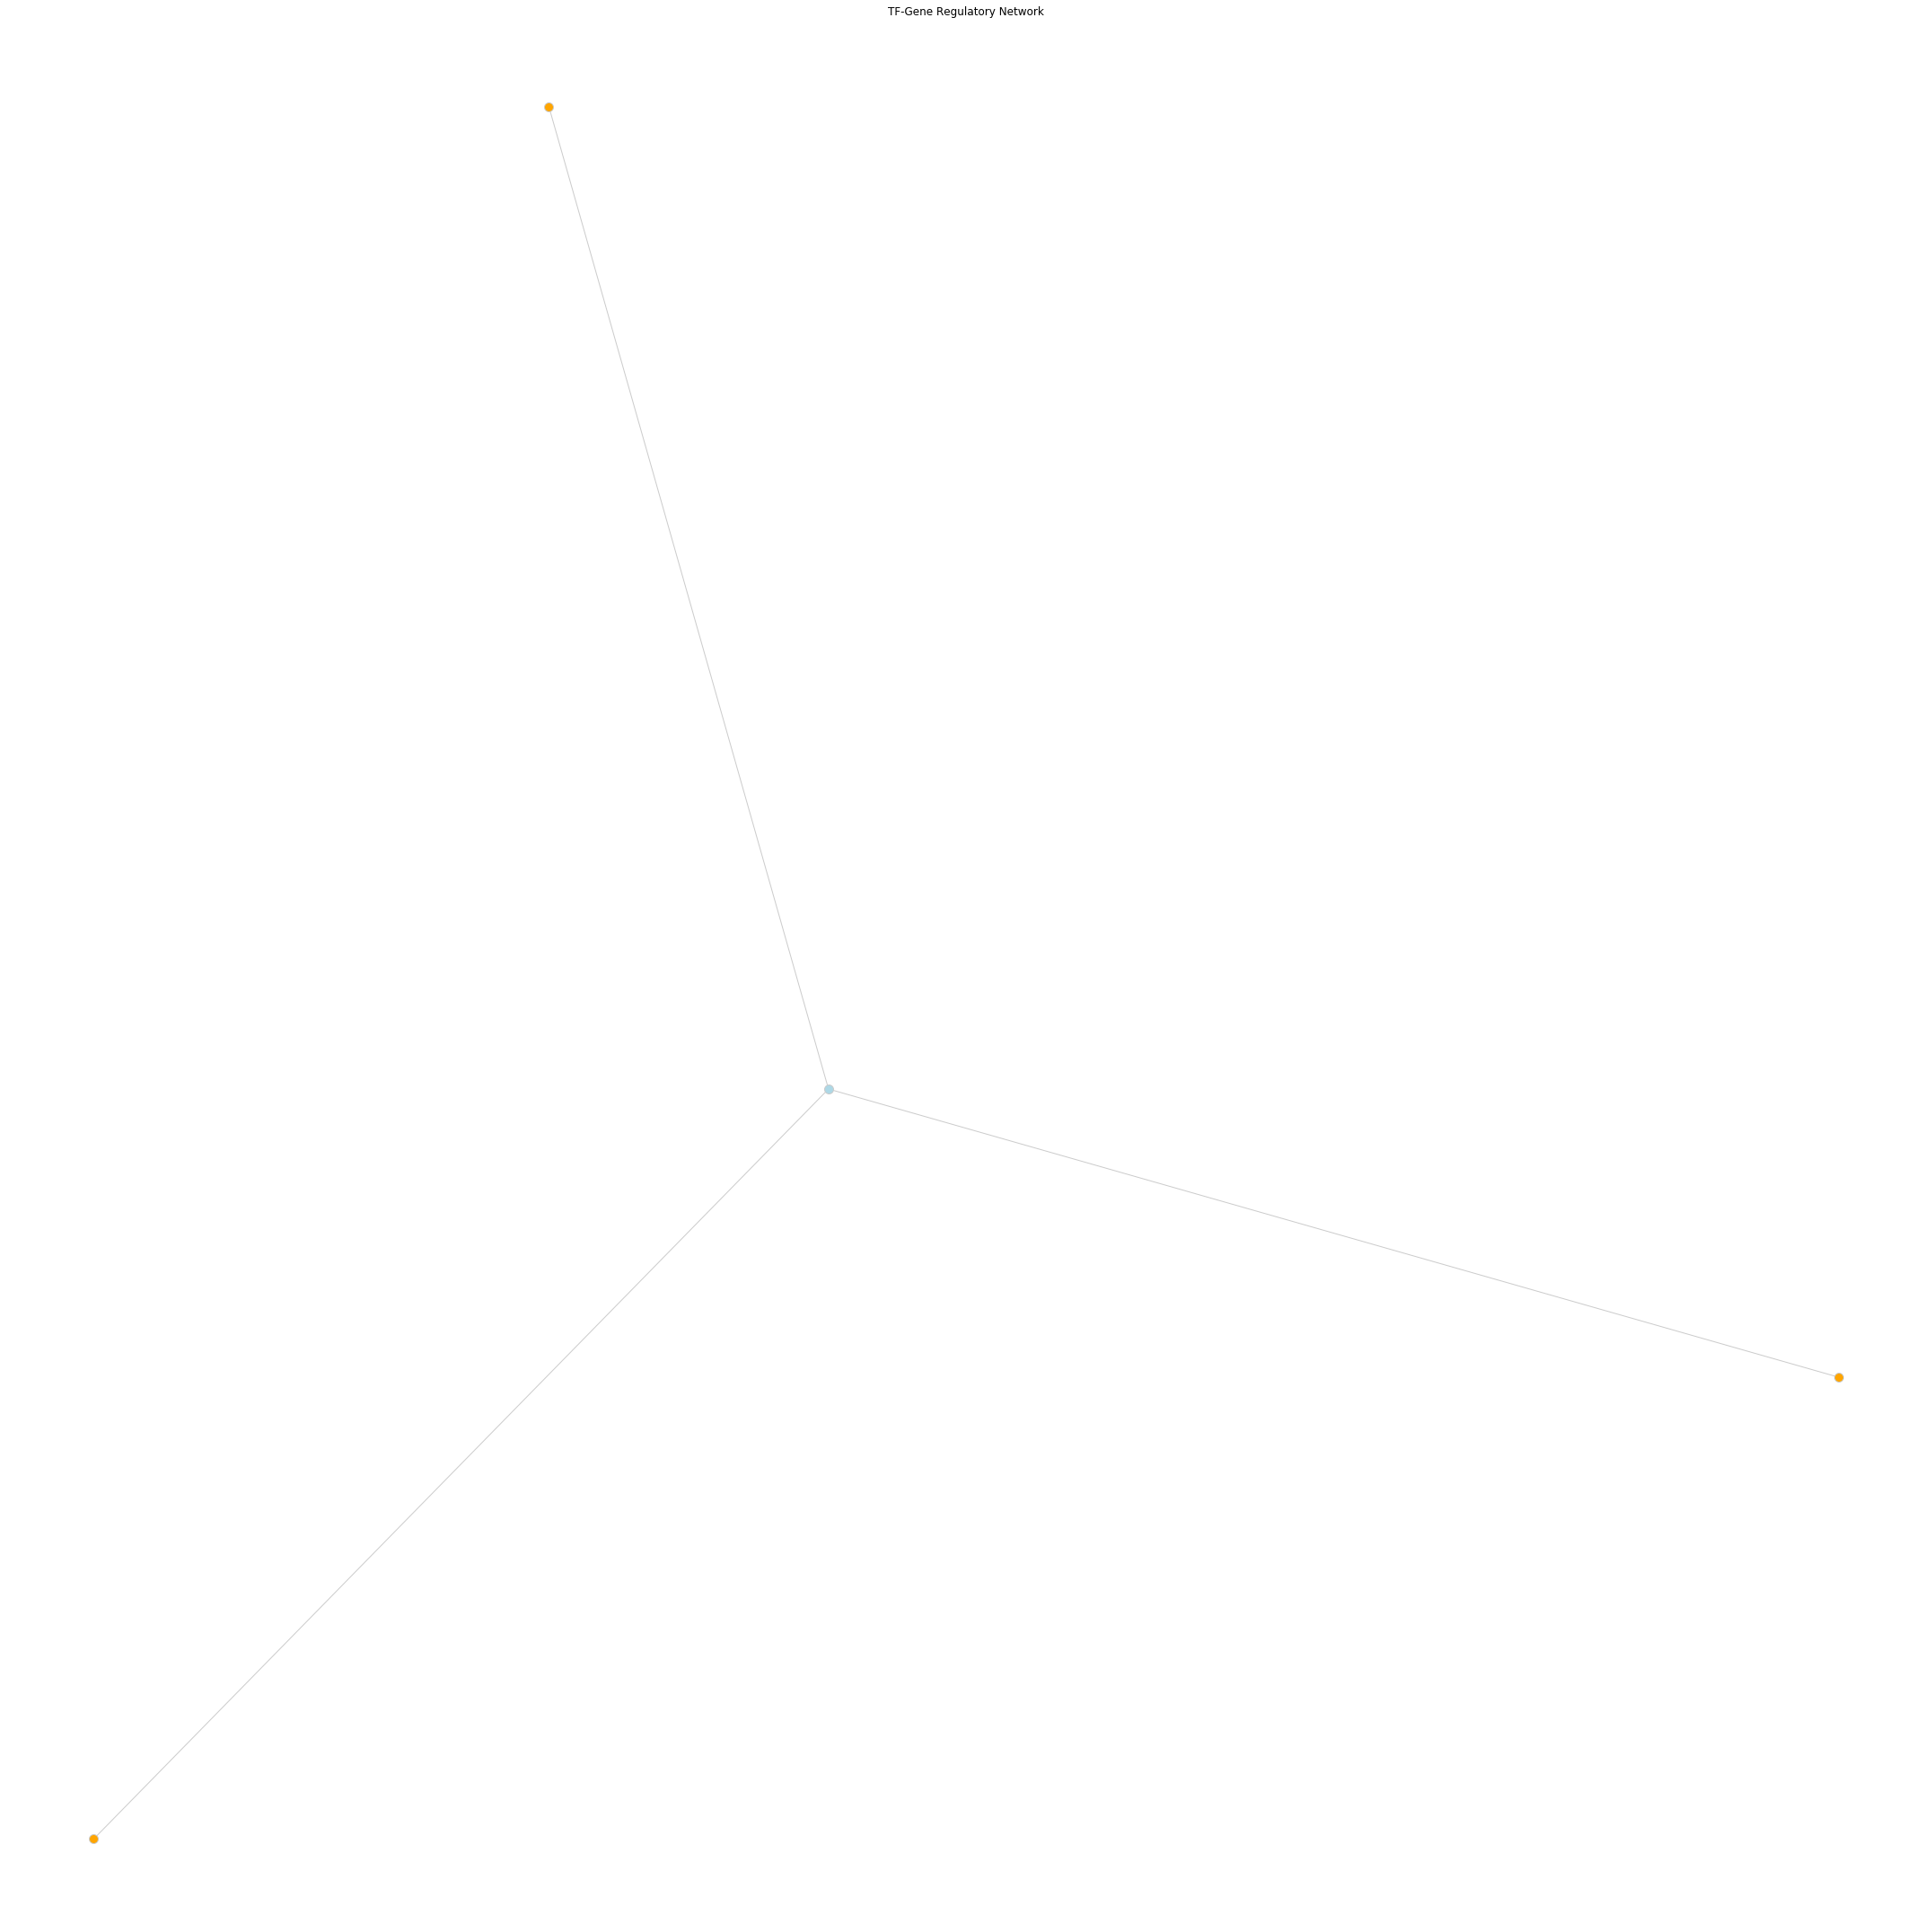

In [10]:
plt.rc('figure', figsize=(30, 30))
k = 5/np.sqrt(G.order())
layout = nx.spring_layout(G, k=0.05, iterations=50, seed=5)
tfs = list(df.tf.unique())
genes = list(df.gene.unique())
nx.draw_networkx_nodes(G, layout, nodelist=tfs, node_color='lightblue', node_size=100, edgecolors='#cccccc')
nx.draw_networkx_nodes(G, layout, nodelist=genes, node_color='orange', node_size=100, edgecolors="#cccccc")
nx.draw_networkx_edges(G, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(tfs, tfs))
plt.axis('off')
plt.title("TF-Gene Regulatory Network")
plt.tight_layout()
# plt.savefig('../images/main.png')
plt.show()

In [11]:
# Laplacian
print(L.todense())


[[ 3 -1 -1 -1]
 [-1  1  0  0]
 [-1  0  1  0]
 [-1  0  0  1]]


In [13]:
# adjacency matrix
print(nx.adjacency_matrix(G).todense())

[[0 1 1 1]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


/Users/YuhouZhou/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


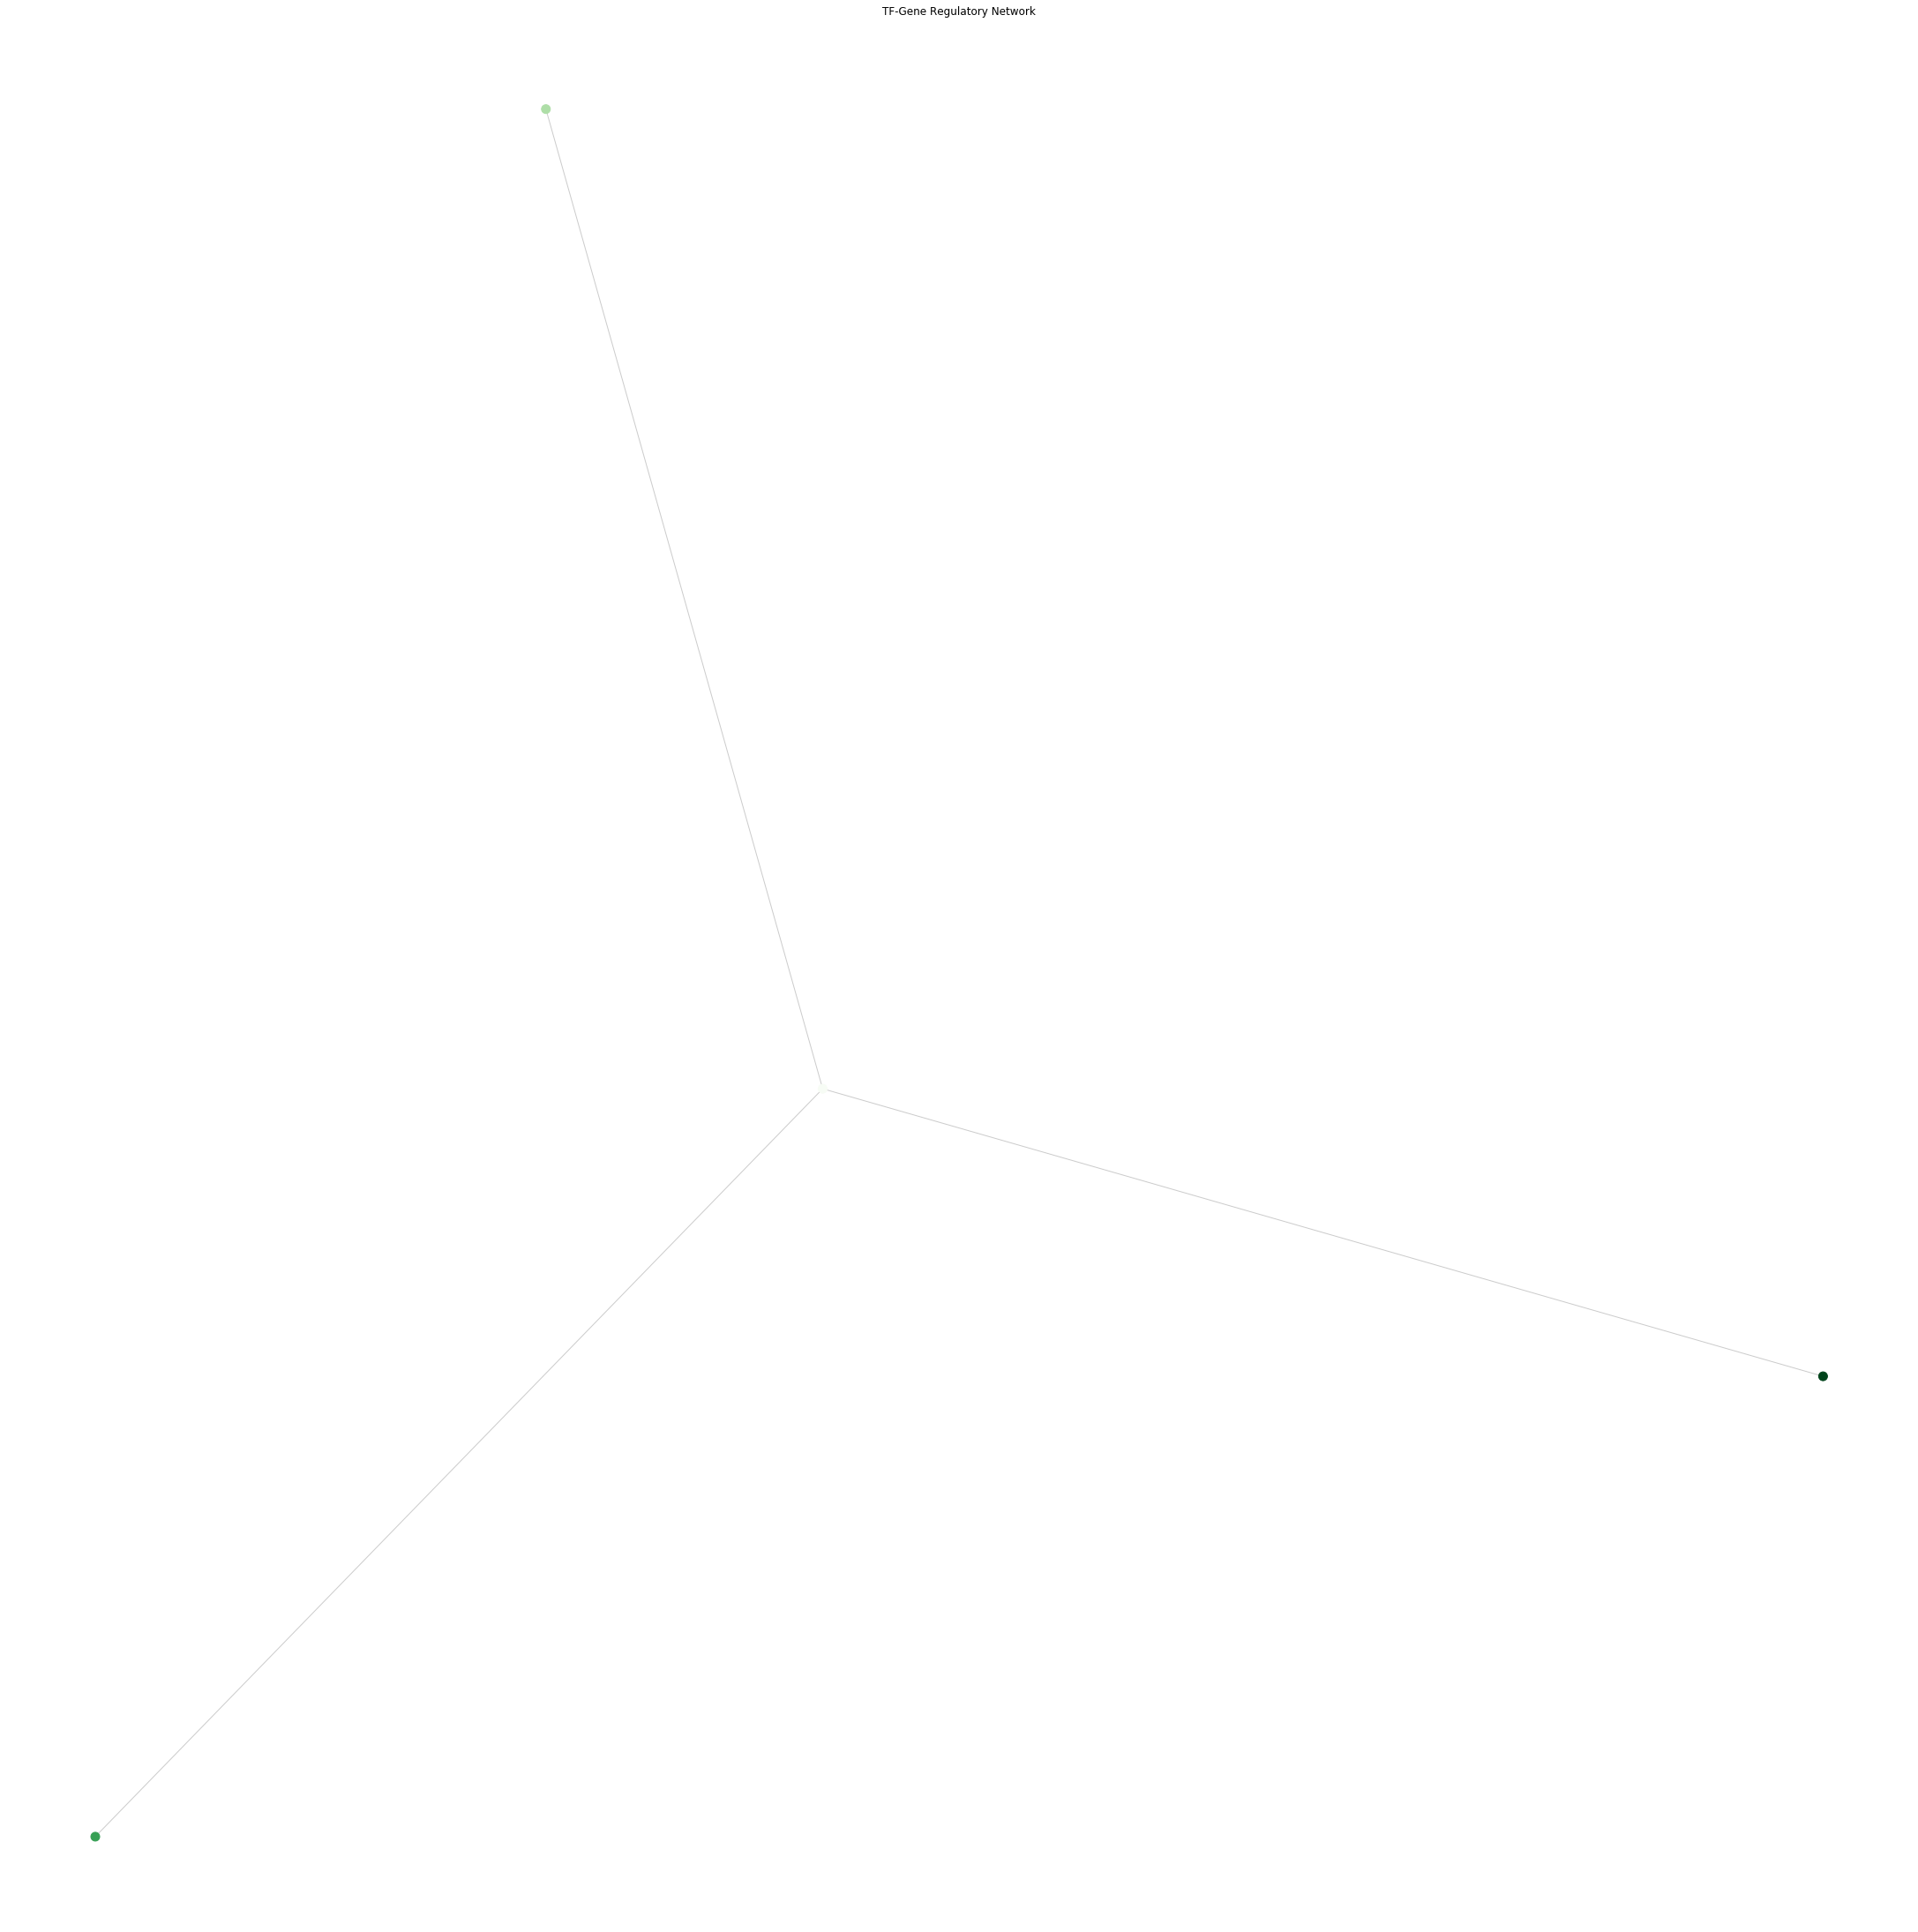

In [19]:
plt.rc('figure', figsize=(30, 30))
layout = nx.spring_layout(G, k=0.05, iterations=50, seed=5)
# TODO: node_color shoule be changed to the coefficient of eigenvectors 
nx.draw(G, layout, node_size=100, node_color=range(L.shape[0]), edge_color="#cccccc", cmap=plt.cm.Greens)
plt.axis('off')
plt.title("TF-Gene Regulatory Network")
plt.tight_layout()
# plt.savefig('../images/laplacian.png')
plt.show()